# Task 1

In [1]:
from utils import *
from MySolution import MyClassifier
from sklearn.decomposition import PCA

## Synthetic Data

In [2]:
syn_data = prepare_synthetic_data()
X_train, y_train = syn_data['trainX'], syn_data['trainY']
X_test, y_test = syn_data['testX'], syn_data['testY']

In [3]:
clf_syn = MyClassifier()
clf_syn.train(X_train, y_train)
y_pred = clf_syn.predict(X_test)

In [4]:
acc_syn = clf_syn.evaluate(X_test, y_test)
print(f"Accuracy: {acc_syn*100:.2f}%")

Accuracy: 97.20%


### Confusion Matrix

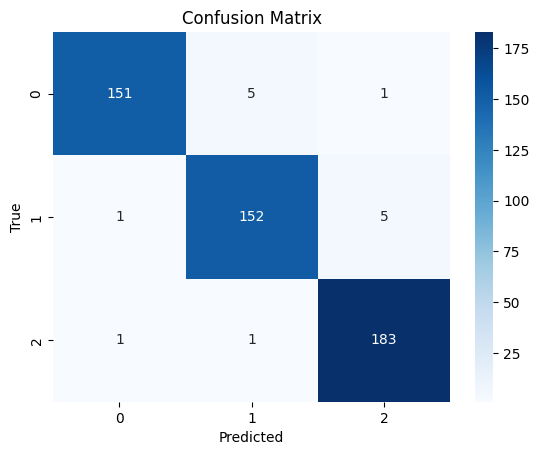

In [5]:
clf_syn.plot_confusion_matrix(y_pred, y_test)

### Decision Boundary

#### Training Split

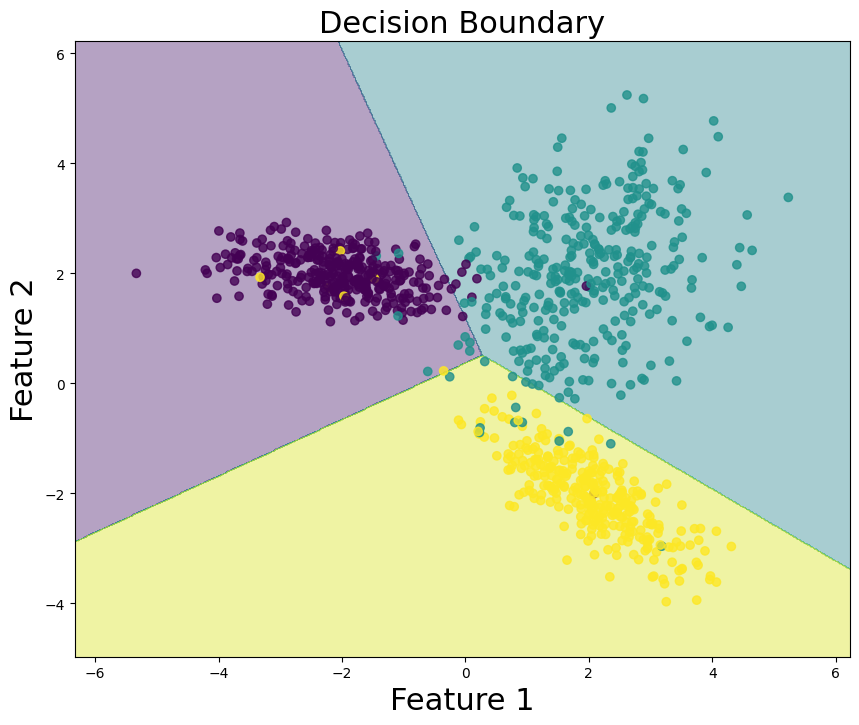

In [6]:
clf_syn.plot_decision_boundary(X_train, y_train, title="Decision Boundary")

#### Test Split

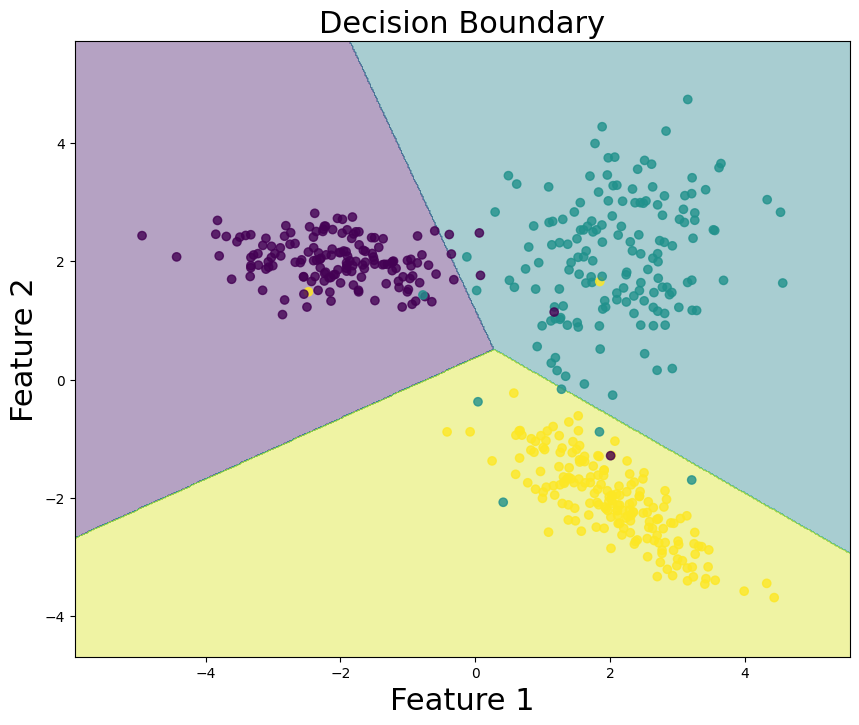

In [7]:
clf_syn.plot_decision_boundary(X_test, y_test, title="Decision Boundary")

### Different regularization parameters

In [8]:
lambdas = [0.1, 0.5, 1, 5, 10, 50, 100]
accuracies = []
for l in lambdas:
    clf_syn = MyClassifier(lambda_reg=l)
    clf_syn.train(X_train, y_train)
    y_pred = clf_syn.predict(X_test)
    accuracy = clf_syn.evaluate(X_test, y_test)
    accuracies.append(accuracy)

In [9]:
print('The best lambda and its accuracy:', lambdas[np.argmax(accuracies)], np.max(accuracies))

The best lambda and its accuracy: 5 0.974


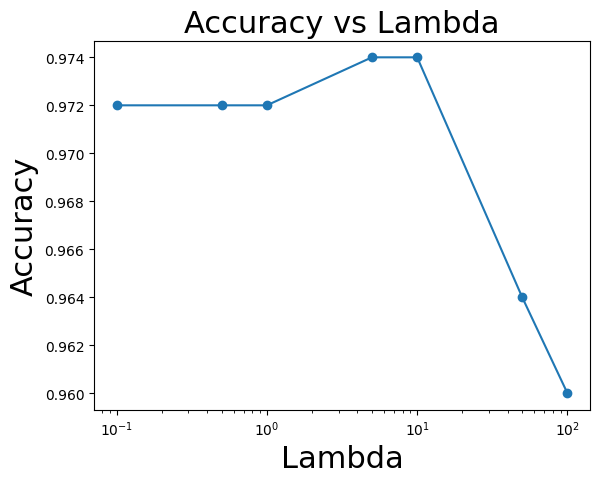

In [10]:
plt.scatter(lambdas, accuracies)
plt.plot(lambdas, accuracies)
plt.xlabel("Lambda", fontsize=22)
plt.ylabel("Accuracy", fontsize=22)
plt.title("Accuracy vs Lambda", fontsize=22)
plt.xscale('log')
plt.show()

## Fashion MNIST

PCA has been used here to reduce the dimensionality of the data. The data has been reduced to different dimensions and the accuracy of the model has been calculated for each dimension. The accuracy has been plotted against the number of dimensions.

When the data is reduced to 2 dimensions, the decision boundary is plotted.

In [11]:
# load mnist data
mnist_data = prepare_mnist_data()

n_dim = [784, 500, 300, 100, 10, 5, 2]

### Full dimensionality

In [12]:
pca = PCA(n_components=n_dim[0]) 
X_train_reduced = pca.fit_transform(mnist_data['trainX'])
X_test_reduced = pca.transform(mnist_data['testX'])

trainX_reduced = X_train_reduced/255
testX_reduced = X_test_reduced/255
trainY = mnist_data['trainY']
testY = mnist_data['testY']

In [13]:
clf_mnist = MyClassifier()
clf_mnist.train(trainX_reduced, trainY)
y_pred = clf_mnist.predict(testX_reduced)

In [14]:
accs = clf_mnist.evaluate(testX_reduced, testY)
print(f"Accuracy: {accs*100:.2f}%")

Accuracy: 76.40%


#### Confusion Matrix

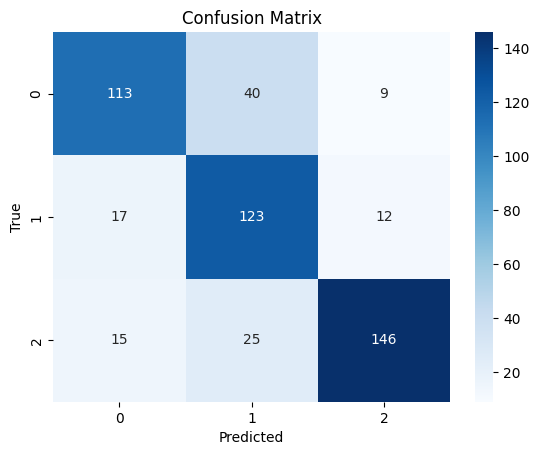

In [15]:
clf_mnist.plot_confusion_matrix(y_pred, testY)

### Different Dimensionality

In [16]:
# plot the accuracy vs number of dimensions
accs = []
for n in n_dim:
    pca = PCA(n_components=n)
    X_train_reduced = pca.fit_transform(mnist_data['trainX'])
    X_test_reduced = pca.transform(mnist_data['testX'])

    trainX_reduced = X_train_reduced/255
    testX_reduced = X_test_reduced/255
    trainY = mnist_data['trainY']
    testY = mnist_data['testY']

    clf_mnist = MyClassifier()
    clf_mnist.train(trainX_reduced, trainY)
    y_pred = clf_mnist.predict(testX_reduced)

    accs.append(clf_mnist.evaluate(testX_reduced, testY))

In [17]:
print(accs)
print('Max accuracy and occuring at n_dim:', max(accs), n_dim[accs.index(max(accs))])

[0.764, 0.874, 0.86, 0.908, 0.902, 0.874, 0.676]
Max accuracy and occuring at n_dim: 0.908 100


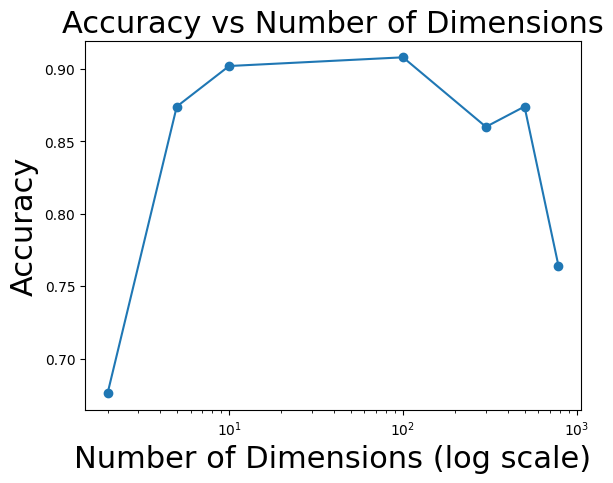

In [18]:
#scatter with line plot and dim on log scale
plt.scatter(n_dim, accs)
plt.plot(n_dim, accs)
plt.xlabel("Number of Dimensions (log scale)", fontsize=22)
plt.ylabel("Accuracy", fontsize=22)
plt.title("Accuracy vs Number of Dimensions", fontsize=22)
plt.xscale('log')
plt.show()

### Decision Boundary (only 2 features using PCA)

In [19]:
pca = PCA(n_components=n_dim[-1])  # Reduce to 50 dimensions
X_train_reduced = pca.fit_transform(mnist_data['trainX'])
X_test_reduced = pca.transform(mnist_data['testX'])

trainX_reduced = X_train_reduced/255
testX_reduced = X_test_reduced/255
trainY = mnist_data['trainY']
testY = mnist_data['testY']

In [20]:
clf_mnist = MyClassifier()
clf_mnist.train(trainX_reduced, trainY)
y_pred = clf_mnist.predict(testX_reduced)

In [21]:
acc_mnist_2 = clf_mnist.evaluate(testX_reduced, testY)
print(f"Accuracy: {acc_mnist_2*100:.2f}%")

Accuracy: 67.60%


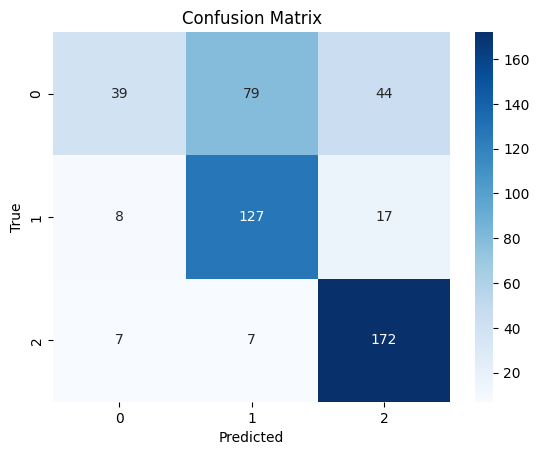

In [22]:
clf_mnist.plot_confusion_matrix(y_pred, testY)

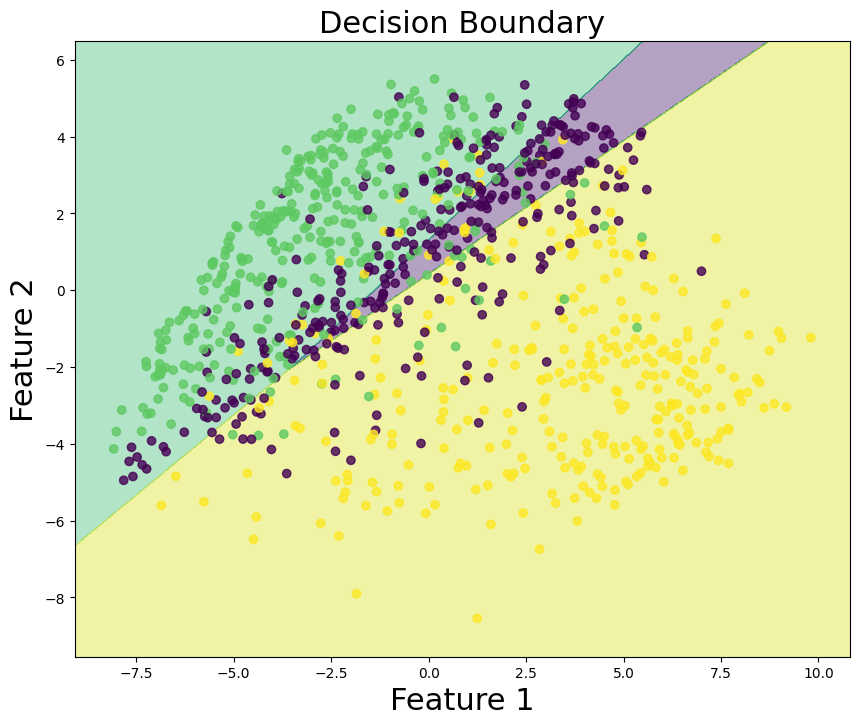

In [23]:
clf_mnist.plot_decision_boundary(trainX_reduced, trainY, title="Decision Boundary")

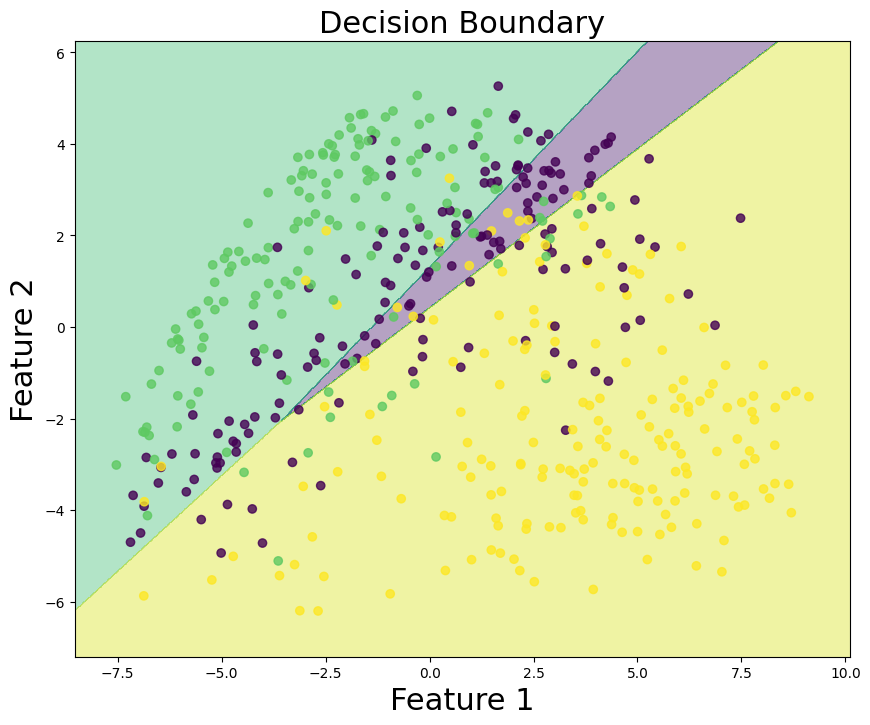

In [24]:
clf_mnist.plot_decision_boundary(testX_reduced, testY, title="Decision Boundary")

### Different Regularization Parameters

In [25]:
lambdas = [1e-4, 1e-2, 0.1, 1, 5, 10]
n_dim = 10 # max of accuracy vs number of dimensions
accuracies = []
for l in lambdas:
    pca = PCA(n_components=n_dim)  # Reduce to 10 dimensions as max accuracy occurs at 10
    X_train_reduced = pca.fit_transform(mnist_data['trainX'])
    X_test_reduced = pca.transform(mnist_data['testX'])

    trainX_reduced = X_train_reduced/255
    testX_reduced = X_test_reduced/255
    trainY = mnist_data['trainY']
    testY = mnist_data['testY']

    clf_mnist = MyClassifier(lambda_reg=l)
    clf_mnist.train(trainX_reduced, trainY)
    y_pred = clf_mnist.predict(testX_reduced)
    accuracy = clf_mnist.evaluate(testX_reduced, testY)
    accuracies.append(accuracy)

In [26]:
print('The maximum accuracy and the lambda value:', max(accuracies), lambdas[accuracies.index(max(accuracies))])
acc_mnist = max(accuracies)

The maximum accuracy and the lambda value: 0.9 0.1


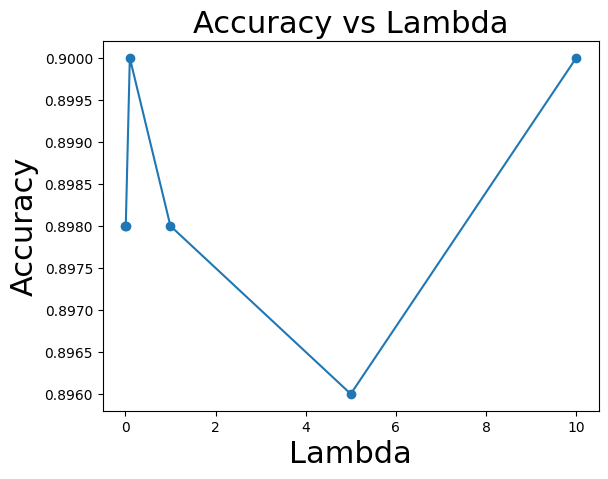

In [27]:
plt.scatter(lambdas, accuracies)
plt.plot(lambdas, accuracies)
plt.xlabel("Lambda", fontsize=22)
plt.ylabel("Accuracy", fontsize=22)
plt.title("Accuracy vs Lambda", fontsize=22)
plt.show()

# Task 2

In [28]:
import json
from MySolution import MyClustering, plot_clustering_nmi, plot_classification_accuracy, plot_performance_across_partitions
from utils import *

In [29]:
K_synthetic = [3, 5, 10]
K_mnist = [3, 10, 32]
result2 = {}

### Synthetic Data

#### Full Dataset

In [30]:
nmi_list = []
accuracy_list = []
# Synthetic data experiments
for K in K_synthetic:
    data = prepare_synthetic_data()
    clustering_class = MyClustering(K)
    clustering_class.train(data['trainX'])
    #change dtype of trainY to int
    data['trainY'] = data['trainY'].astype(int)
    nmi = clustering_class.evaluate_clustering(data['trainY'])
    nmi_list.append(nmi)
    print('-'*30)
    print(f"Clustering NMI for K={K}: {nmi}")
    accuracy = clustering_class.evaluate_classification(data['trainY'], data['testX'], data['testY'])
    accuracy_list.append(accuracy)
    print(f"Classification accuracy for K={K}: {accuracy}")
    print('#'*30)
result2['synthetic'] = {'K': K_synthetic, 'clustering_nmi': nmi_list, 'classification_accuracy': accuracy_list}

Number of components selected: 2
Explained variance covered: 1.00
Converged after 10 iterations.
------------------------------
Clustering NMI for K=3: 0.8278254854605318
Classification accuracy for K=3: 0.968
##############################
Number of components selected: 2
Explained variance covered: 1.00
------------------------------
Clustering NMI for K=5: 0.8324857966241579
Classification accuracy for K=5: 0.956
##############################
Number of components selected: 2
Explained variance covered: 1.00
------------------------------
Clustering NMI for K=10: 0.8706387879991366
Classification accuracy for K=10: 0.972
##############################


#### 0.75, 0.50, 0.25 of Dataset

In [31]:
# Synthetic data experiments
data_portions = [0.25, 0.5, 0.75, 1]
result2_portion = {}
for portion in data_portions:
    nmi_list = []
    accuracy_list = [] 
    for K in K_synthetic:
        data = prepare_synthetic_data()
        data['trainX'] = data['trainX'][:int(portion*len(data['trainX']))]
        data['trainY'] = data['trainY'][:int(portion*len(data['trainY']))]
        clustering_class = MyClustering(K)
        clustering_class.train(data['trainX'])
        #change dtype of trainY to int
        data['trainY'] = data['trainY'].astype(int)
        nmi = clustering_class.evaluate_clustering(data['trainY'])
        nmi_list.append(nmi)
        print('-'*30)
        print(f"Clustering NMI for K={K} and portion={portion}: {nmi}")
        accuracy = clustering_class.evaluate_classification(data['trainY'], data['testX'], data['testY'])
        accuracy_list.append(accuracy)
        print(f"Classification accuracy for K={K} and portion={portion}: {accuracy}")
        print('#'*30)
        if f'{portion}' not in result2_portion:
            result2_portion[f'{portion}'] = {}

        if 'synthetic' not in result2_portion[f'{portion}']:
            result2_portion[f'{portion}']['synthetic'] = {}
    result2_portion[f'{portion}']['synthetic'] = {'K': K_synthetic, 'clustering_nmi': nmi_list, 'classification_accuracy': accuracy_list}

Number of components selected: 2
Explained variance covered: 1.00
Converged after 10 iterations.
------------------------------
Clustering NMI for K=3 and portion=0.25: 0.8812953335040112
Classification accuracy for K=3 and portion=0.25: 0.966
##############################
Number of components selected: 2
Explained variance covered: 1.00
Converged after 11 iterations.
------------------------------
Clustering NMI for K=5 and portion=0.25: 0.8517356530767728
Classification accuracy for K=5 and portion=0.25: 0.956
##############################
Number of components selected: 2
Explained variance covered: 1.00
Converged after 13 iterations.
------------------------------
Clustering NMI for K=10 and portion=0.25: 0.8714881488591283
Classification accuracy for K=10 and portion=0.25: 0.952
##############################
Number of components selected: 2
Explained variance covered: 1.00
Converged after 6 iterations.
------------------------------
Clustering NMI for K=3 and portion=0.5: 0.8667

### Fashion MNIST Dataset

#### Full Dataset

In [32]:
nmi_list = []
accuracy_list = []
# MNIST data experiments
for K in K_mnist:
    data = prepare_mnist_data()
    clustering_class = MyClustering(K)
    clustering_class.train(data['trainX'])
    #change dtype of trainY to int
    data['trainY'] = data['trainY'].astype(int)
    nmi = clustering_class.evaluate_clustering(data['trainY'])
    nmi_list.append(nmi)
    print('-'*30)
    print(f"Clustering NMI for K={K}: {nmi}")
    accuracy = clustering_class.evaluate_classification(data['trainY'], data['testX'], data['testY'])
    accuracy_list.append(accuracy)
    print(f"Classification accuracy for K={K}: {accuracy}")
    print('#'*30)
result2['mnist'] = {'K': K_mnist, 'clustering_nmi': nmi_list, 'classification_accuracy': accuracy_list}

print(result2)

Number of components selected: 123
Explained variance covered: 0.95
------------------------------
Clustering NMI for K=3: 0.2830073932294135
Classification accuracy for K=3: 0.61
##############################
Number of components selected: 123
Explained variance covered: 0.95
------------------------------
Clustering NMI for K=10: 0.4772762188860594
Classification accuracy for K=10: 0.802
##############################
Number of components selected: 123
Explained variance covered: 0.95
Converged after 16 iterations.
------------------------------
Clustering NMI for K=32: 0.6095052253176331
Classification accuracy for K=32: 0.856
##############################
{'synthetic': {'K': [3, 5, 10], 'clustering_nmi': [np.float64(0.8278254854605318), np.float64(0.8324857966241579), np.float64(0.8706387879991366)], 'classification_accuracy': [0.968, 0.956, 0.972]}, 'mnist': {'K': [3, 10, 32], 'clustering_nmi': [np.float64(0.2830073932294135), np.float64(0.4772762188860594), np.float64(0.6095052

#### 0.25, 0.50., 0.75 of the Dataset

In [33]:
# Mnist data experiments
data_portions = [0.25, 0.5, 0.75, 1]
for portion in data_portions:
    nmi_list = []
    accuracy_list = []
    for K in K_mnist:
        data = prepare_mnist_data()
        data['trainX'] = data['trainX'][:int(portion*len(data['trainX']))]
        data['trainY'] = data['trainY'][:int(portion*len(data['trainY']))]
        clustering_class = MyClustering(K)
        clustering_class.train(data['trainX'])
        #change dtype of trainY to int
        data['trainY'] = data['trainY'].astype(int)
        nmi = clustering_class.evaluate_clustering(data['trainY'])
        nmi_list.append(nmi)
        print('-'*30)
        print(f"Clustering NMI for K={K} and portion={portion}: {nmi}")
        accuracy = clustering_class.evaluate_classification(data['trainY'], data['testX'], data['testY'])
        accuracy_list.append(accuracy)
        print(f"Classification accuracy for K={K} and portion={portion}: {accuracy}")
        print('#'*30)
    result2_portion[f'{portion}']['mnist'] = {'K': K_synthetic, 'clustering_nmi': nmi_list, 'classification_accuracy': accuracy_list}

print(result2_portion)

Number of components selected: 77
Explained variance covered: 0.95
Converged after 8 iterations.
------------------------------
Clustering NMI for K=3 and portion=0.25: 0.2861072828270944
Classification accuracy for K=3 and portion=0.25: 0.582
##############################
Number of components selected: 77
Explained variance covered: 0.95
Converged after 10 iterations.
------------------------------
Clustering NMI for K=10 and portion=0.25: 0.4936513054925101
Classification accuracy for K=10 and portion=0.25: 0.74
##############################
Number of components selected: 77
Explained variance covered: 0.95
Converged after 8 iterations.
------------------------------
Clustering NMI for K=32 and portion=0.25: 0.6761834248119287
Classification accuracy for K=32 and portion=0.25: 0.854
##############################
Number of components selected: 102
Explained variance covered: 0.95
Converged after 8 iterations.
------------------------------
Clustering NMI for K=3 and portion=0.5: 0.

### Soft Clustering Classifier

#### Synthetic Data

In [34]:
from MySolution import run_soft_clustering_classifier, compare_soft_vs_hard_clustering

In [35]:
# Synthetic data experiments
data_portions = [0.25, 0.5, 0.75, 1]
result2_soft_clustering = {}
for portion in data_portions:
    nmi_list = []
    accuracy_list = [] 
    for K in K_synthetic:
        data = prepare_synthetic_data()
        data['trainX'] = data['trainX'][:int(portion*len(data['trainX']))]
        data['trainY'] = data['trainY'][:int(portion*len(data['trainY']))]
        clustering_class = run_soft_clustering_classifier(data['trainX'], data['trainY'], K)
        accuracy = clustering_class.evaluate(data['testX'], data['testY'])
        accuracy_list.append(accuracy)
        print(f"Classification accuracy for K={K} and portion={portion}: {accuracy}")
        print('#'*30)
        if f'{portion}' not in result2_soft_clustering:
            result2_soft_clustering[f'{portion}'] = {}

        if 'synthetic' not in result2_soft_clustering[f'{portion}']:
            result2_soft_clustering[f'{portion}']['synthetic'] = {}
    result2_soft_clustering[f'{portion}']['synthetic'] = {'K': K_synthetic, 'clustering_nmi': nmi_list, 'classification_accuracy': accuracy_list}

Number of components selected: 2
Explained variance covered: 1.00
Converged after 7 iterations.
Classification accuracy for K=3 and portion=0.25: 0.956
##############################
Number of components selected: 2
Explained variance covered: 1.00
Converged after 7 iterations.
Classification accuracy for K=5 and portion=0.25: 0.952
##############################
Number of components selected: 2
Explained variance covered: 1.00
Converged after 9 iterations.
Classification accuracy for K=10 and portion=0.25: 0.96
##############################
Number of components selected: 2
Explained variance covered: 1.00
Converged after 8 iterations.
Classification accuracy for K=3 and portion=0.5: 0.966
##############################
Number of components selected: 2
Explained variance covered: 1.00
Converged after 14 iterations.
Classification accuracy for K=5 and portion=0.5: 0.972
##############################
Number of components selected: 2
Explained variance covered: 1.00
Converged after 14 i

In [36]:
# Mnist data experiments
data_portions = [0.25, 0.5, 0.75, 1]
for portion in data_portions:
    nmi_list = []
    accuracy_list = []
    for K in K_mnist:
        data = prepare_mnist_data()
        data['trainX'] = data['trainX'][:int(portion*len(data['trainX']))]
        data['trainY'] = data['trainY'][:int(portion*len(data['trainY']))]
        clustering_class = run_soft_clustering_classifier(data['trainX'], data['trainY'], K)
        accuracy = clustering_class.evaluate(data['testX'], data['testY'])
        accuracy_list.append(accuracy)
        print(f"Classification accuracy for K={K} and portion={portion}: {accuracy}")
        print('#'*30)
    result2_soft_clustering[f'{portion}']['mnist'] = {'K': K_synthetic, 'clustering_nmi': nmi_list, 'classification_accuracy': accuracy_list}

print(result2_soft_clustering)

Number of components selected: 77
Explained variance covered: 0.95
Converged after 20 iterations.
Classification accuracy for K=3 and portion=0.25: 0.906
##############################
Number of components selected: 77
Explained variance covered: 0.95
Converged after 10 iterations.
Classification accuracy for K=10 and portion=0.25: 0.906
##############################
Number of components selected: 77
Explained variance covered: 0.95
Converged after 4 iterations.
Classification accuracy for K=32 and portion=0.25: 0.904
##############################
Number of components selected: 102
Explained variance covered: 0.95
Converged after 13 iterations.
Classification accuracy for K=3 and portion=0.5: 0.9
##############################
Number of components selected: 102
Explained variance covered: 0.95
Converged after 17 iterations.
Classification accuracy for K=10 and portion=0.5: 0.902
##############################
Number of components selected: 102
Explained variance covered: 0.95
Converg

### Task 4.4

In [72]:
from MySolution import run_soft_clustering_alternative, compare_classification_accuracy

#### Highest Score

In [73]:
nmi_list = []
accuracy_list = []
# Synthetic data experiments
result2_soft_clustering_alternative_highest_score = {}
for K in K_synthetic:
    data = prepare_synthetic_data()
    clustering_class = run_soft_clustering_alternative(data['trainX'], data['trainY'], K, method='highest_score')
    #change dtype of trainY to int
    data['trainY'] = data['trainY'].astype(int)
    accuracy = clustering_class.evaluate(data['testX'], data['testY'])
    accuracy_list.append(accuracy)
    print(f"Classification accuracy for K={K}: {accuracy}")
    print('#'*30)
result2_soft_clustering_alternative_highest_score['synthetic'] = {'K': K_synthetic, 'clustering_nmi': nmi_list, 'classification_accuracy': accuracy_list}

Number of components selected: 2
Explained variance covered: 1.00
Converged after 7 iterations.
Classification accuracy for K=3: 0.968
##############################
Number of components selected: 2
Explained variance covered: 1.00
Converged after 20 iterations.
Classification accuracy for K=5: 0.968
##############################
Number of components selected: 2
Explained variance covered: 1.00
Converged after 13 iterations.
Classification accuracy for K=10: 0.974
##############################


In [74]:
nmi_list = []
accuracy_list = []
# MNIST data experiments
for K in K_mnist:
    data = prepare_mnist_data()
    clustering_class = run_soft_clustering_alternative(data['trainX'], data['trainY'], K, method='highest_score')
    #change dtype of trainY to int
    data['trainY'] = data['trainY'].astype(int)
    accuracy = clustering_class.evaluate(data['testX'], data['testY'])
    accuracy_list.append(accuracy)
    print(f"Classification accuracy for K={K}: {accuracy}")
    print('#'*30)
result2_soft_clustering_alternative_highest_score['mnist'] = {'K': K_mnist, 'clustering_nmi': nmi_list, 'classification_accuracy': accuracy_list}

print(result2_soft_clustering_alternative_highest_score)

Number of components selected: 123
Explained variance covered: 0.95
Converged after 13 iterations.
Classification accuracy for K=3: 0.642
##############################
Number of components selected: 123
Explained variance covered: 0.95
Classification accuracy for K=10: 0.832
##############################
Number of components selected: 123
Explained variance covered: 0.95
Converged after 16 iterations.
Classification accuracy for K=32: 0.874
##############################
{'synthetic': {'K': [3, 5, 10], 'clustering_nmi': [], 'classification_accuracy': [0.968, 0.968, 0.974]}, 'mnist': {'K': [3, 10, 32], 'clustering_nmi': [], 'classification_accuracy': [0.642, 0.832, 0.874]}}


#### Representative Points

In [75]:
nmi_list = []
accuracy_list = []
# Synthetic data experiments
result2_soft_clustering_alternative_representative_points = {}
for K in K_synthetic:
    data = prepare_synthetic_data()
    clustering_class = run_soft_clustering_alternative(data['trainX'], data['trainY'], K, method='representative_points')
    #change dtype of trainY to int
    data['trainY'] = data['trainY'].astype(int)
    accuracy = clustering_class.evaluate(data['testX'], data['testY'], method='representative_points')
    accuracy_list.append(accuracy)
    print(f"Classification accuracy for K={K}: {accuracy}")
    print('#'*30)
result2_soft_clustering_alternative_representative_points['synthetic'] = {'K': K_synthetic, 'clustering_nmi': nmi_list, 'classification_accuracy': accuracy_list}

Number of components selected: 2
Explained variance covered: 1.00
Converged after 9 iterations.
Classification accuracy for K=3: 0.968
##############################
Number of components selected: 2
Explained variance covered: 1.00
Converged after 10 iterations.
Classification accuracy for K=5: 0.956
##############################
Number of components selected: 2
Explained variance covered: 1.00
Classification accuracy for K=10: 0.974
##############################


In [76]:
nmi_list = []
accuracy_list = []
# MNIST data experiments
for K in K_mnist:
    data = prepare_mnist_data()
    clustering_class = run_soft_clustering_alternative(data['trainX'], data['trainY'], K, method='representative_points')
    #change dtype of trainY to int
    data['trainY'] = data['trainY'].astype(int)
    accuracy = clustering_class.evaluate(data['testX'], data['testY'], method='representative_points')
    accuracy_list.append(accuracy)
    print(f"Classification accuracy for K={K}: {accuracy}")
    print('#'*30)
result2_soft_clustering_alternative_representative_points['mnist'] = {'K': K_mnist, 'clustering_nmi': nmi_list, 'classification_accuracy': accuracy_list}

print(result2_soft_clustering_alternative_representative_points)

Number of components selected: 123
Explained variance covered: 0.95
Converged after 18 iterations.
Classification accuracy for K=3: 0.612
##############################
Number of components selected: 123
Explained variance covered: 0.95
Converged after 17 iterations.
Classification accuracy for K=10: 0.816
##############################
Number of components selected: 123
Explained variance covered: 0.95
Converged after 19 iterations.
Classification accuracy for K=32: 0.836
##############################
{'synthetic': {'K': [3, 5, 10], 'clustering_nmi': [], 'classification_accuracy': [0.968, 0.956, 0.974]}, 'mnist': {'K': [3, 10, 32], 'clustering_nmi': [], 'classification_accuracy': [0.612, 0.816, 0.836]}}


#### Results

In [77]:
print("Full Dataset Results")
# print as json format
print(result2)
print("Portion Dataset Results")
# print as json format
print(result2_portion)
print("Soft Clustering Results")
print(result2_soft_clustering)

print("Task 4 Results")
print(result2_soft_clustering_alternative_highest_score)

Full Dataset Results
{'synthetic': {'K': [3, 5, 10], 'clustering_nmi': [np.float64(0.8278254854605318), np.float64(0.8324857966241579), np.float64(0.8706387879991366)], 'classification_accuracy': [0.968, 0.956, 0.972]}, 'mnist': {'K': [3, 10, 32], 'clustering_nmi': [np.float64(0.2830073932294135), np.float64(0.4772762188860594), np.float64(0.6095052253176331)], 'classification_accuracy': [0.61, 0.802, 0.856]}}
Portion Dataset Results
{'0.25': {'synthetic': {'K': [3, 5, 10], 'clustering_nmi': [np.float64(0.8812953335040112), np.float64(0.8517356530767728), np.float64(0.8714881488591283)], 'classification_accuracy': [0.966, 0.956, 0.952]}, 'mnist': {'K': [3, 5, 10], 'clustering_nmi': [np.float64(0.2861072828270944), np.float64(0.4936513054925101), np.float64(0.6761834248119287)], 'classification_accuracy': [0.582, 0.74, 0.854]}}, '0.5': {'synthetic': {'K': [3, 5, 10], 'clustering_nmi': [np.float64(0.8667957170416377), np.float64(0.883353792510898), np.float64(0.9024150502946565)], 'class

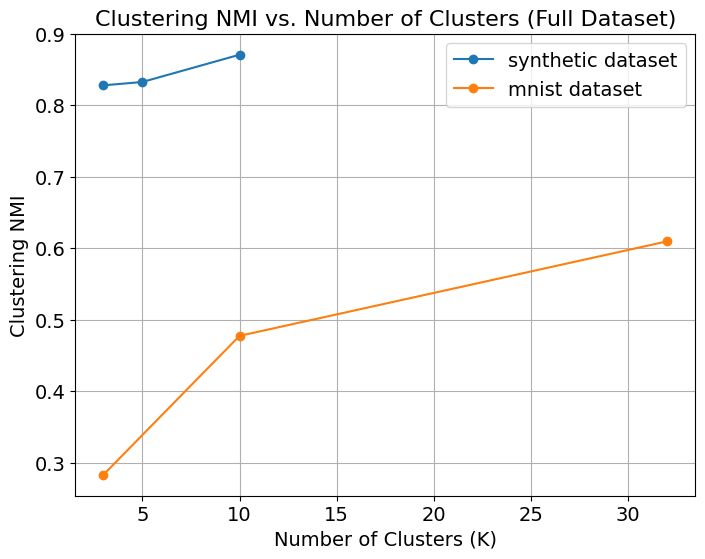

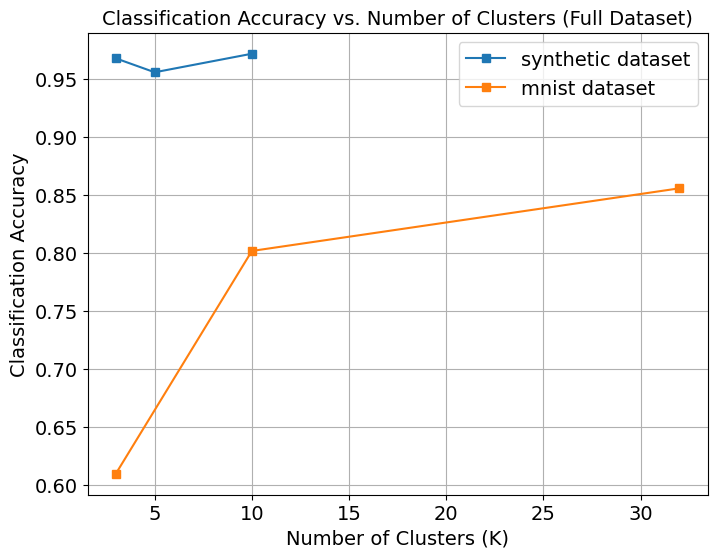

In [78]:
# Generate Plots
plot_clustering_nmi(result2, "Clustering NMI vs. Number of Clusters (Full Dataset)")
plot_classification_accuracy(result2, "Classification Accuracy vs. Number of Clusters (Full Dataset)")

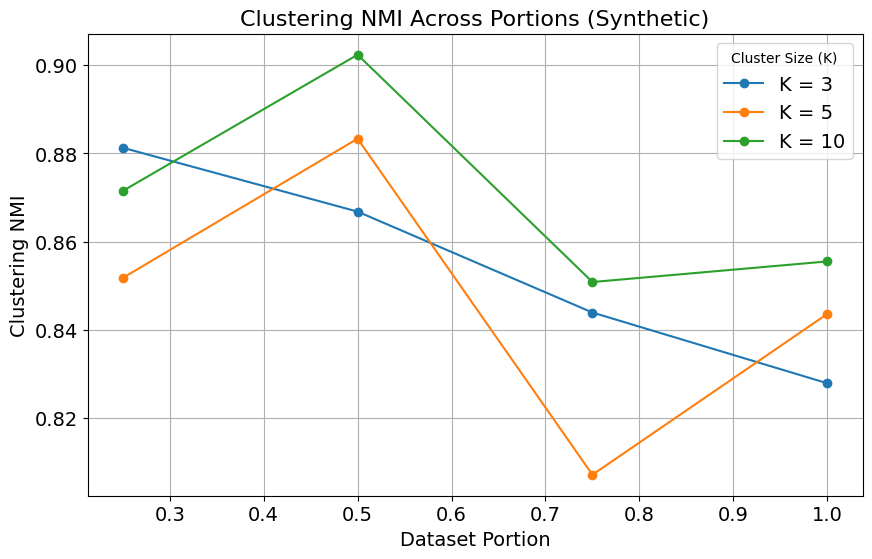

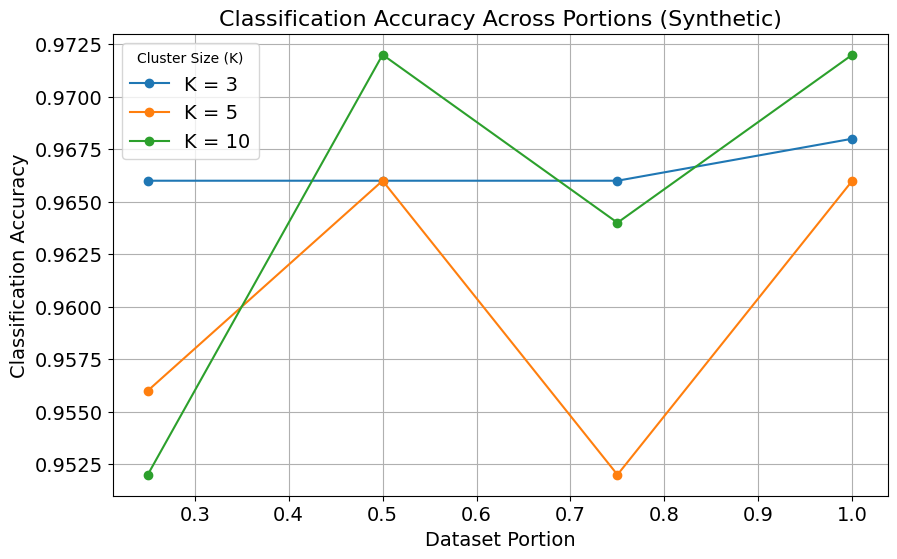

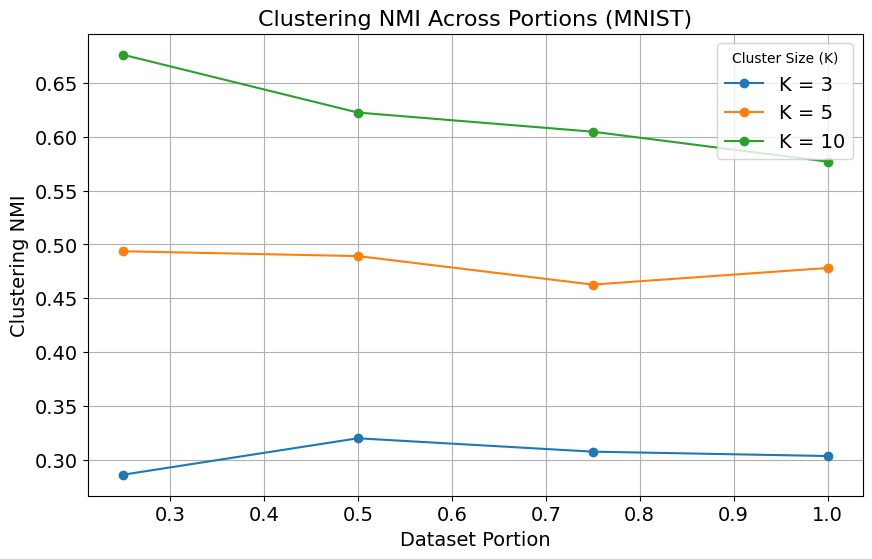

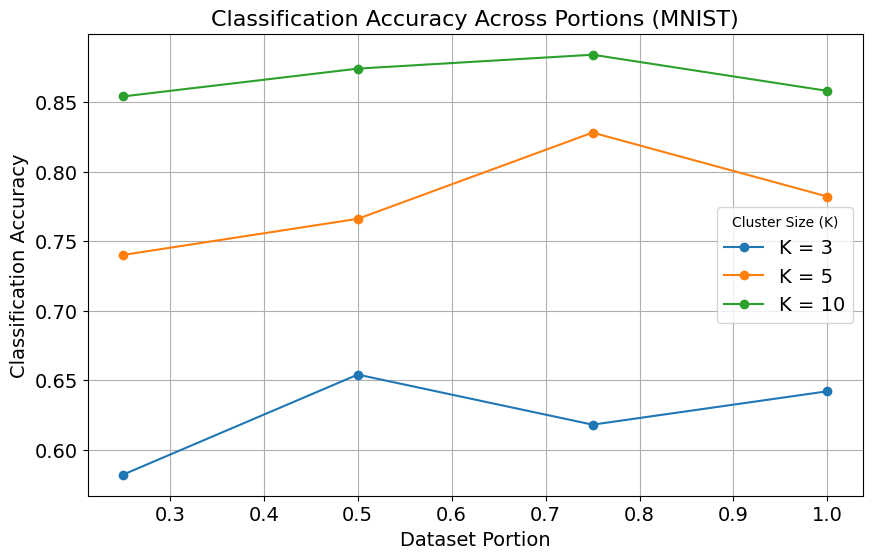

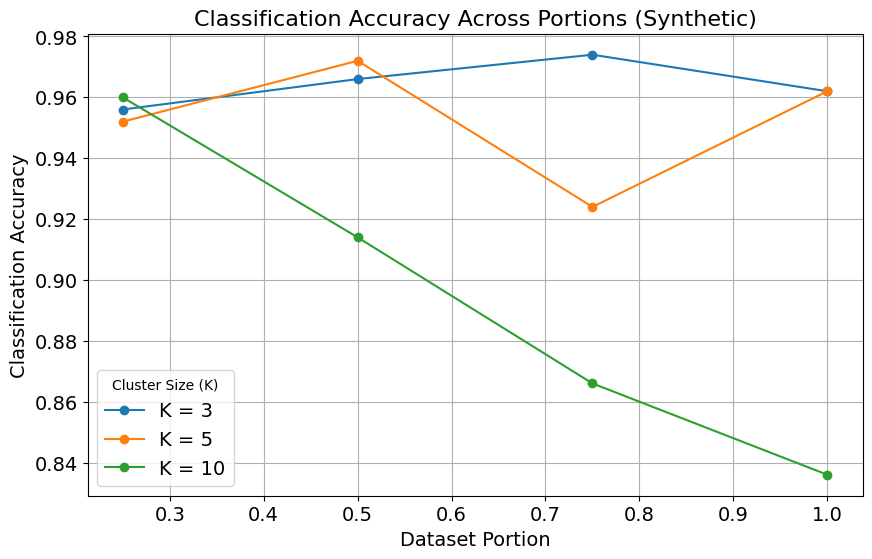

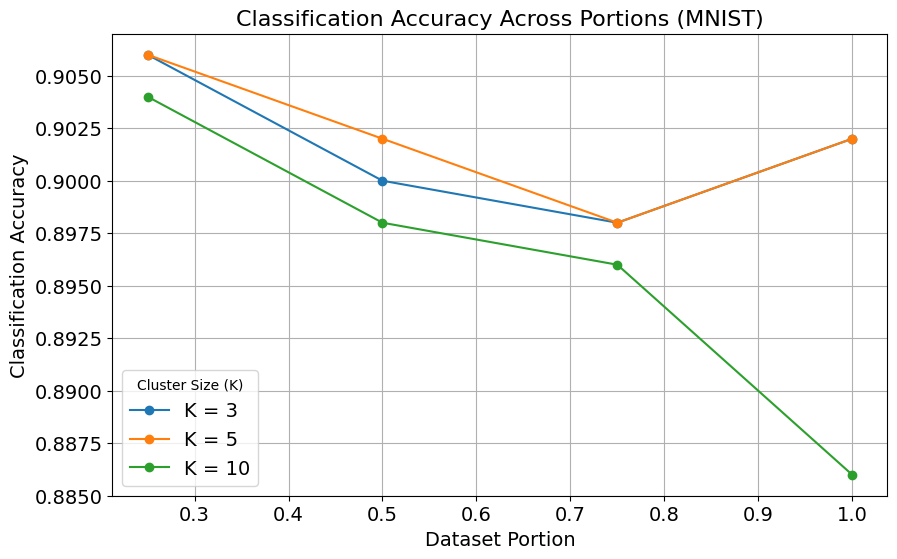

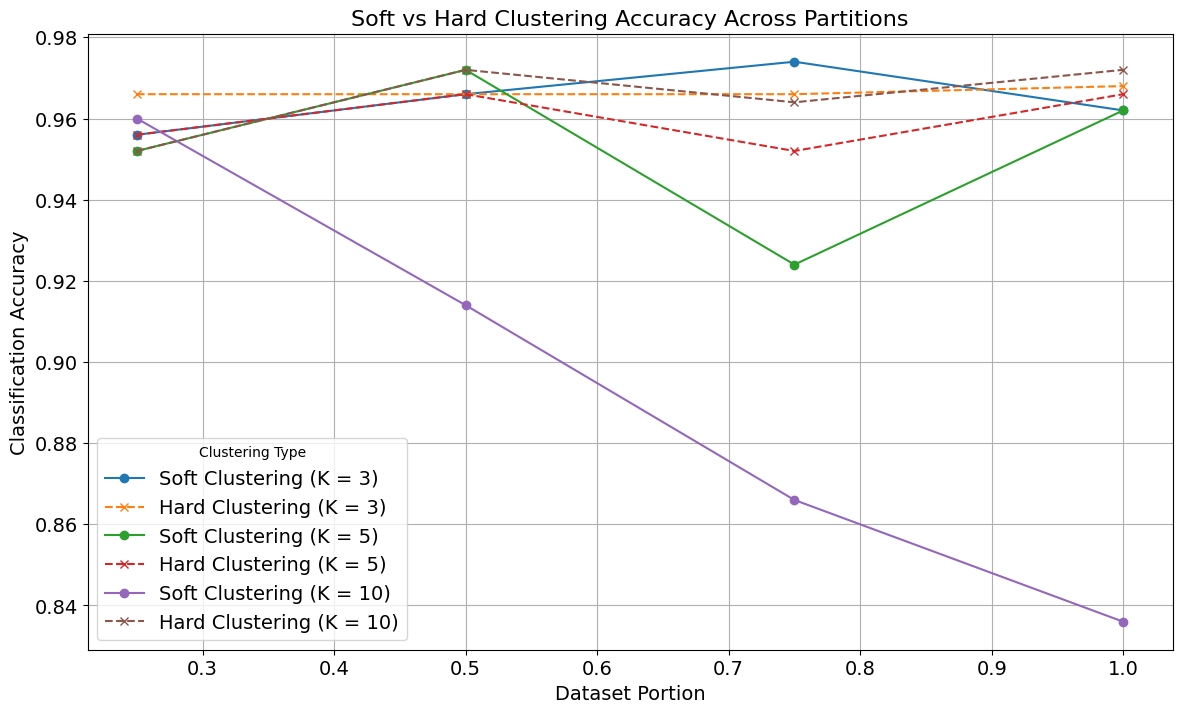

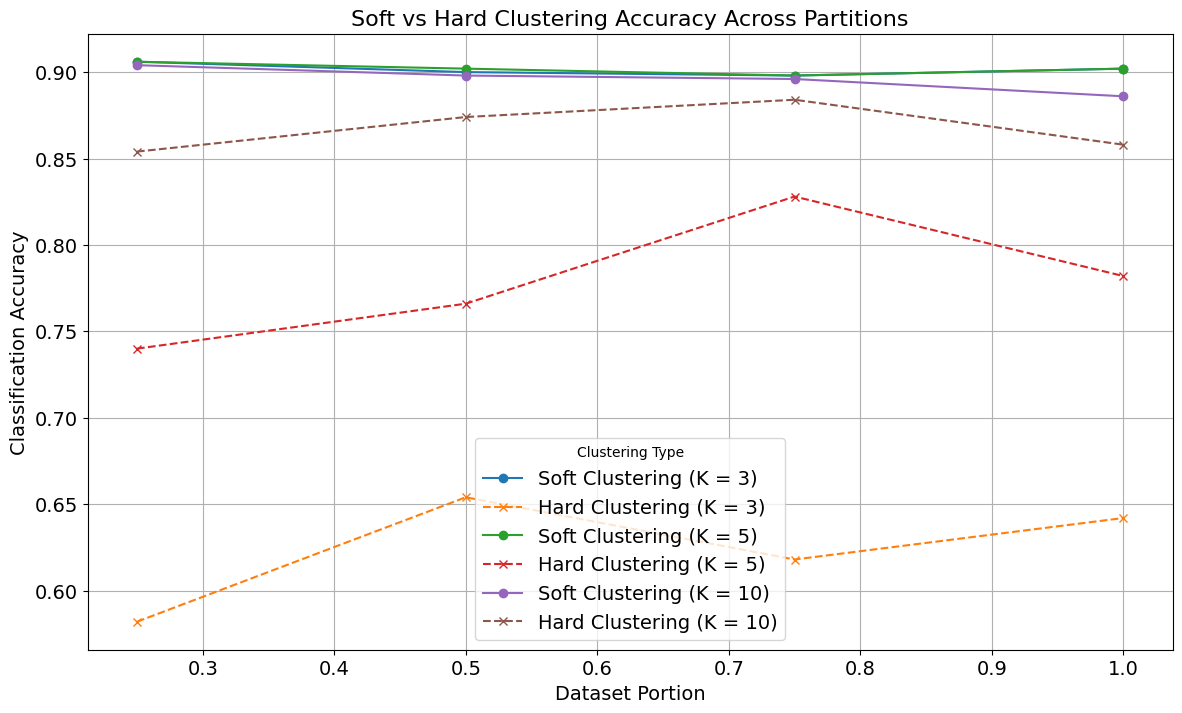

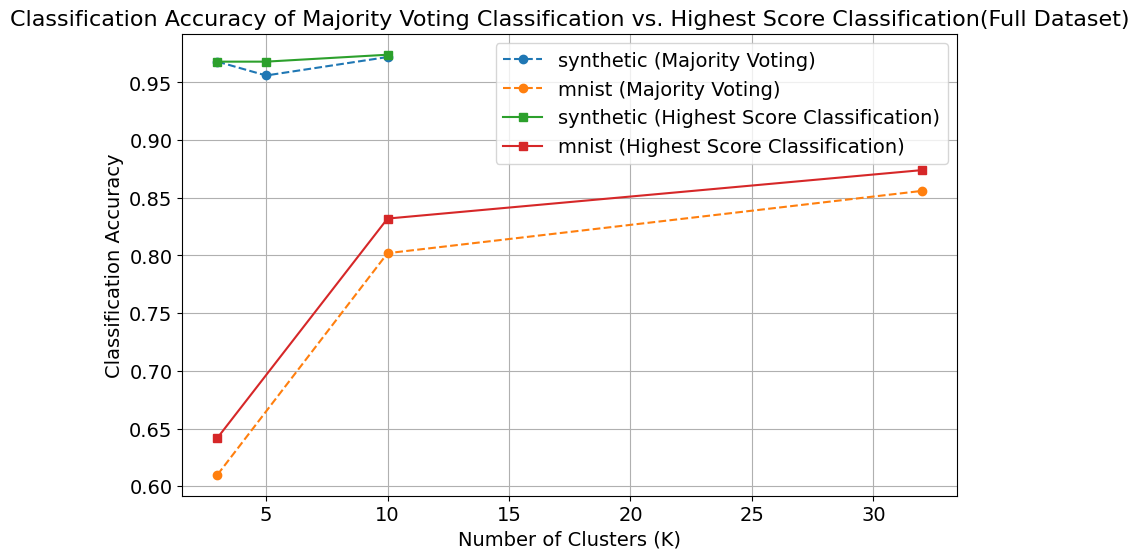

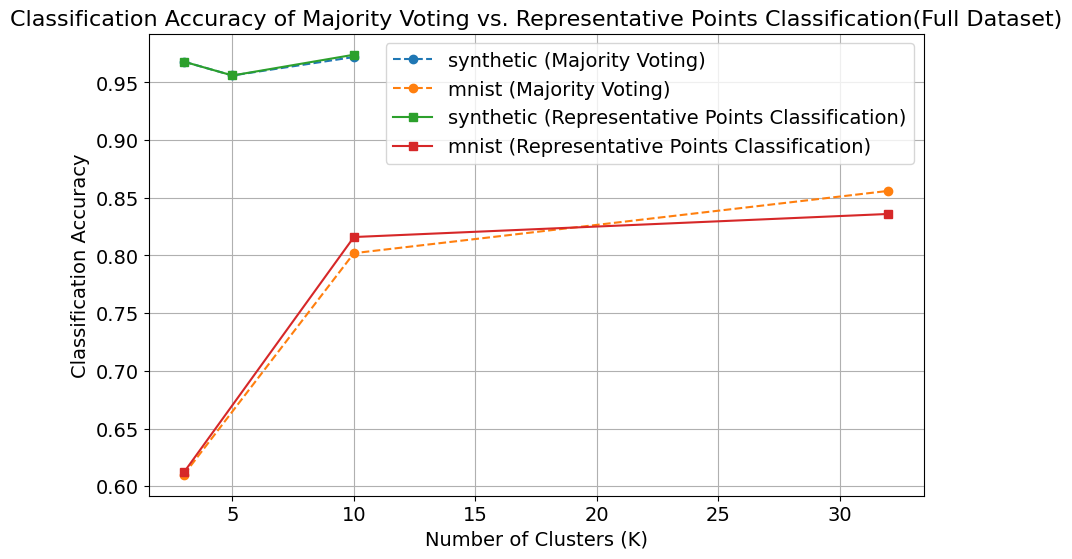

In [79]:
# Plot clustering NMI and classification accuracy for synthetic dataset
plot_performance_across_partitions(result2_portion, 'synthetic', 'clustering_nmi', 
                                    "Clustering NMI Across Portions (Synthetic)", "Clustering NMI")
plot_performance_across_partitions(result2_portion, 'synthetic', 'classification_accuracy', 
                                    "Classification Accuracy Across Portions (Synthetic)", "Classification Accuracy")

# Plot clustering NMI and classification accuracy for MNIST dataset
plot_performance_across_partitions(result2_portion, 'mnist', 'clustering_nmi', 
                                    "Clustering NMI Across Portions (MNIST)", "Clustering NMI")
plot_performance_across_partitions(result2_portion, 'mnist', 'classification_accuracy', 
                                    "Classification Accuracy Across Portions (MNIST)", "Classification Accuracy")

# Plot classification accuracy for soft clustering
plot_performance_across_partitions(result2_soft_clustering, 'synthetic', 'classification_accuracy', 
                                    "Classification Accuracy Across Portions (Synthetic)", "Classification Accuracy")

plot_performance_across_partitions(result2_soft_clustering, 'mnist', 'classification_accuracy',
                                    "Classification Accuracy Across Portions (MNIST)", "Classification Accuracy")

# Plot classification accuracy for soft clustering vs normal clustering for synthetic dataset with partitions
compare_soft_vs_hard_clustering(
    result2_soft_clustering,
    result2_portion,
    dataset_name="synthetic",
    metric="classification_accuracy",
    title="Soft vs Hard Clustering Accuracy Across Partitions",
    ylabel="Classification Accuracy",
)

compare_soft_vs_hard_clustering(
    result2_soft_clustering,
    result2_portion,
    dataset_name="mnist",
    metric="classification_accuracy",
    title="Soft vs Hard Clustering Accuracy Across Partitions",
    ylabel="Classification Accuracy",
)

compare_classification_accuracy(result2, result2_soft_clustering_alternative_highest_score, "Classification Accuracy of Majority Voting Classification vs. Highest Score Classification(Full Dataset)", "Highest Score Classification")
compare_classification_accuracy(result2, result2_soft_clustering_alternative_representative_points, "Classification Accuracy of Majority Voting vs. Representative Points Classification(Full Dataset)", "Representative Points Classification")

# Task 3

## Prepare Data

In [45]:
import numpy as np
from gekko import GEKKO
from MySolution import *
from utils import *


data = prepare_mnist_data()
trainX = data['trainX']
trainY = data['trainY'].astype(np.int64)

testX = data['testX']
testY = data['testY'].astype(np.int64)


## Set up objects for storing results (selecte features and accuracies)

In [46]:
num_features_list = [5, 20, 80, 320, 784]
# num_features_list = [80]


# Store the features being chosen for visualization later
classifier_features_dict = {}
clustering_features_dict = {}
random_features_dict = {}

# Store accuracy metrics
classifier_accuracy_selected = np.zeros(len(num_features_list))
classifier_accuracy_random = np.zeros(len(num_features_list))

clustering_accuracy_selected = np.zeros(len(num_features_list))
clustering_accuracy_random = np.zeros(len(num_features_list))

clustering_nmi_selected = np.zeros(len(num_features_list))
clustering_nmi_random = np.zeros(len(num_features_list))

In [47]:
np.random.seed(25)
random_selected_features_list = [np.random.choice(data['trainX'].shape[1], num_features, replace=False) for num_features in num_features_list]

## Compute Supervised Learning Performance

In [48]:
for i, num_features in enumerate(num_features_list):

    print(f"Processing num_features={num_features}")



    ##### Find the features to train the models on

    feature_selector = MyFeatureSelection(num_features)
    
    # Generate selected features from each of the 3 methods - supervised feature selection, unsupervised feature selection
    # and random feature selection
    classifier_selected_features = feature_selector.construct_new_features(trainX, trainY)
    random_selected_features = random_selected_features_list[i]

    # Save the selected features for visualization
    classifier_features_dict[num_features] = classifier_selected_features
    random_features_dict[num_features] = random_selected_features

    # Restrict trainX to the features selected
    trainX_classifier_selected = trainX[:, classifier_selected_features]
    trainX_random_selected = trainX[:, random_selected_features]

    # Restrict trainY to the features selected
    testX_classifier_selected = testX[:, classifier_selected_features]
    testX_random_selected = testX[:, random_selected_features]



    ##### Train the models using the selected features

    print(f"    Training Classifiers")
    # Train Classifier with Selected and Random Features
    classifier_selected = MyClassifier()
    classifier_selected.train(trainX_classifier_selected, trainY)
    # ----
    classifier_random = MyClassifier()
    classifier_random.train(trainX_random_selected, trainY)
    


    ##### Evaluate the model performances on the test set

    print(f"    Evaluating Classifiers")
    classifier_accuracy_selected[i] = classifier_selected.evaluate(testX_classifier_selected, testY)
    classifier_accuracy_random[i] = classifier_random.evaluate(testX_random_selected, testY)


Processing num_features=5
doing classification feature selection
    Training Classifiers
    Evaluating Classifiers
Processing num_features=20
doing classification feature selection
    Training Classifiers
    Evaluating Classifiers
Processing num_features=80
doing classification feature selection
    Training Classifiers
    Evaluating Classifiers
Processing num_features=320
doing classification feature selection
    Training Classifiers
    Evaluating Classifiers
Processing num_features=784
doing classification feature selection
    Training Classifiers
    Evaluating Classifiers


## Compute Unsupervised Learning Performance

In [49]:
for i, num_features in enumerate(num_features_list):

    print(f"Processing num_features={num_features}")


    ##### Find the features to train the models on

    feature_selector = MyFeatureSelection(num_features)
    
    # Generate selected features from each of the 3 methods - supervised feature selection, unsupervised feature selection
    # and random feature selection
    clustering_selected_features = feature_selector.construct_new_features(trainX)
    random_selected_features = random_selected_features_list[i]

    # Save the selected features for visualization
    clustering_features_dict[num_features] = clustering_selected_features
    random_features_dict[num_features] = random_selected_features

    # Restrict trainX to the features selected
    trainX_clustering_selected = trainX[:, clustering_selected_features]
    trainX_random_selected = trainX[:, random_selected_features]

    # Restrict testX to the features selected
    testX_clustering_selected = testX[:, clustering_selected_features]
    testX_random_selected = testX[:, random_selected_features]



    ##### Train the models using the selected features

    print(f"    Training Clusterers")
    # Train Clusterer with Selected and Random Features
    # Use clustering size 10 according to instructions

    # For num_features=5, must use num_clusters 5 to avoid error
    # Use the minimum of 10, and the number of features in all cases
    clusterer_selected = MyClustering(min(num_features, 10))
    clusterer_selected.train(trainX_clustering_selected)
    # ----
    clusterer_random = MyClustering(min(num_features, 10))
    clusterer_random.train(trainX_random_selected)
    


    ##### Evaluate the model performances on the test set
    
    print(f"    Evaluating Clusterers")
    # Accuracy
    clustering_accuracy_selected[i] = clusterer_selected.evaluate_classification(trainY, testX_clustering_selected, testY)
    clustering_accuracy_random[i] = clusterer_random.evaluate_classification(trainY, testX_random_selected, testY)

    # NMI
    clustering_nmi_selected[i] = clusterer_selected.evaluate_clustering(trainY)
    clustering_nmi_random[i] = clusterer_random.evaluate_clustering(trainY)

Processing num_features=5
doing clustering feature selection
    Training Clusterers
Number of components selected: 4
Explained variance covered: 0.99
Number of components selected: 3
Explained variance covered: 0.96
Converged after 8 iterations.
    Evaluating Clusterers
Processing num_features=20
doing clustering feature selection
    Training Clusterers
Number of components selected: 12
Explained variance covered: 0.96
Number of components selected: 10
Explained variance covered: 0.95
Converged after 20 iterations.
    Evaluating Clusterers
Processing num_features=80
doing clustering feature selection
    Training Clusterers
Number of components selected: 30
Explained variance covered: 0.95
Converged after 15 iterations.
Number of components selected: 36
Explained variance covered: 0.95
Converged after 18 iterations.
    Evaluating Clusterers
Processing num_features=320
doing clustering feature selection
    Training Clusterers
Number of components selected: 74
Explained variance co

## Results Backups

In [50]:
# # Backup accuracy and NMI values

# print(classifier_accuracy_selected)
# print(classifier_accuracy_random)
# print(clustering_accuracy_selected)
# print(clustering_accuracy_random)
# print(clustering_nmi_selected)
# print(clustering_nmi_random)

# classifier_accuracy_selected = [ 0.812, 0.844, 0.85,  0.846, 0.906 ]
# classifier_accuracy_random = [ 0.688, 0.838, 0.894, 0.894, 0.906 ]
# clustering_accuracy_selected = [ 0.7,   0.73,  0.784, 0.812, 0.836 ]
# clustering_accuracy_random = [ 0.642, 0.718, 0.792, 0.826, 0.792 ]
# clustering_nmi_selected = [ 0.31793678, 0.40314891, 0.43211869, 0.49685022, 0.5154581 ]
# clustering_nmi_random = [ 0.31314504, 0.37318521, 0.45311292, 0.49022259, 0.52774433] 

## Selected Features

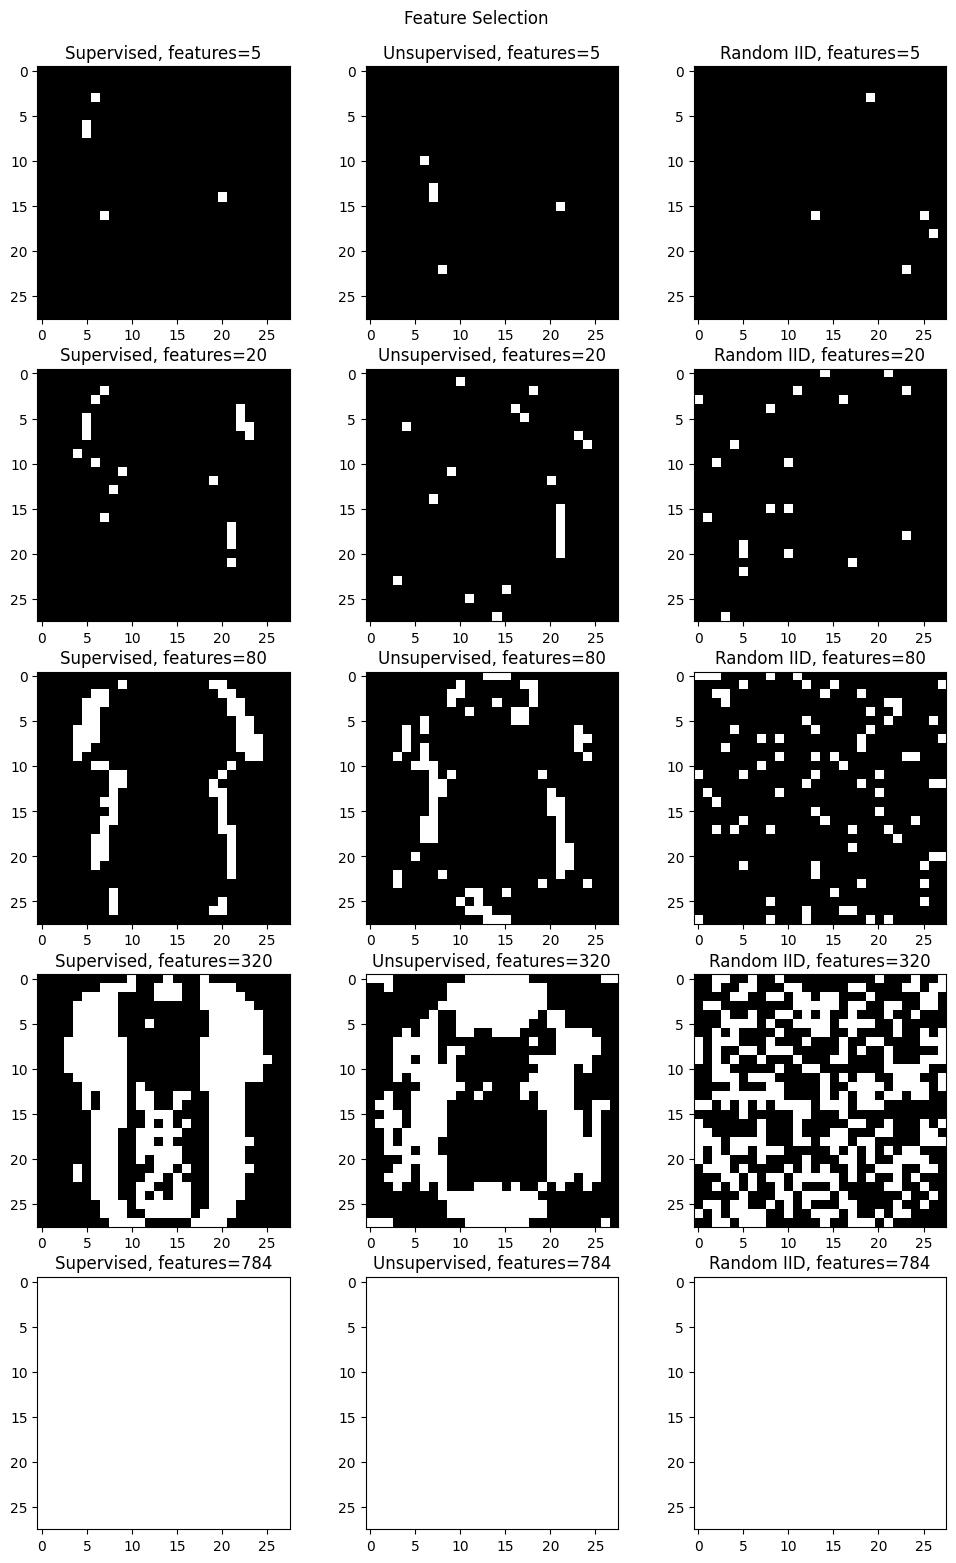

In [51]:
fig, axs = plt.subplots(5,3)

fig.set_figheight(19)
fig.set_figwidth(12)
fig.suptitle("Feature Selection", y=.91)

for i, num_features in enumerate(num_features_list):
    img = np.zeros(784)
    img[classifier_features_dict[num_features]] = 1
    axs[i,0].imshow(img.reshape(28,28), cmap='gray', vmin=0, vmax=1)
    axs[i,0].set_title(f"Supervised, features={num_features}")

    img = np.zeros(784)
    img[clustering_features_dict[num_features]] = 1
    axs[i,1].imshow(img.reshape(28,28), cmap='gray', vmin=0, vmax=1)
    axs[i,1].set_title(f"Unsupervised, features={num_features}")
    
    img = np.zeros(784)
    img[random_selected_features_list[i]] = 1
    axs[i,2].imshow(img.reshape(28,28), cmap='gray', vmin=0, vmax=1)
    axs[i,2].set_title(f"Random IID, features={num_features}")

In [52]:
result3_2 = {'feature_number':                  [5, 20, 80, 320, 784], 
             'classifier_accuracy(our algo)':   classifier_accuracy_selected, 
             'classifier_accuracy(random)':     classifier_accuracy_random, 
             'clustering_accuracy(our algo)':   clustering_accuracy_selected, 
             'clustering_accuracy(random)':     clustering_accuracy_random, 
             'nmi(our algo)':                   clustering_nmi_selected, 
             'nmi(random)':                     clustering_nmi_random}


from pprint import pprint

pprint(result3_2)

{'classifier_accuracy(our algo)': array([0.796, 0.834, 0.85 , 0.864, 0.906]),
 'classifier_accuracy(random)': array([0.688, 0.838, 0.894, 0.894, 0.906]),
 'clustering_accuracy(our algo)': array([0.714, 0.77 , 0.81 , 0.808, 0.764]),
 'clustering_accuracy(random)': array([0.572, 0.732, 0.782, 0.808, 0.844]),
 'feature_number': [5, 20, 80, 320, 784],
 'nmi(our algo)': array([0.31068612, 0.44943611, 0.50618078, 0.52166855, 0.4504986 ]),
 'nmi(random)': array([0.22941429, 0.38285585, 0.51778012, 0.47903185, 0.53726029])}


In [53]:
print(trainX.shape)

(1000, 784)


## Reduced Training Sets

In [54]:
# Reduced Training Sets

# training_portions = [0.01, 0.1, 0.25, 0.5, 0.75, 1]
training_portions = [0.01, 0.1, 0.25, 0.75, 1]
# training_portions = [0.5]
feature_sizes = [20,80,320,784]
question_4_1_accuracies = {}

for tp in training_portions:
    question_4_1_accuracies[tp] = { 'feature_number':                  feature_sizes, 
                                    'classifier_accuracy(our algo)':   None, 
                                    'classifier_accuracy(random)':     None, 
                                    'clustering_accuracy(our algo)':   None, 
                                    'clustering_accuracy(random)':     None, 
                                    'nmi(our algo)':                   None, 
                                    'nmi(random)':                     None}


for tp in training_portions:

    max_idx = int(trainX.shape[0]*tp)

    trainX_reduced = trainX[:max_idx,:]
    trainY_reduced = trainY[:max_idx]
    
    classifier_accuracy_selected_portion = np.zeros(len(feature_sizes))
    classifier_accuracy_random_portion = np.zeros(len(feature_sizes))
    
    clustering_accuracy_selected_portion = np.zeros(len(feature_sizes))
    clustering_accuracy_random_portion = np.zeros(len(feature_sizes))
    
    clustering_nmi_selected_portion = np.zeros(len(feature_sizes))
    clustering_nmi_random_portion = np.zeros(len(feature_sizes))
    
    ############# SUPERVISED LEARNING #############
    for i, num_features in enumerate(feature_sizes):
        
        result = {}
        result['feature_number'] = feature_sizes

        print(f"Processing num_features={num_features}")



        ##### Find the features to train the models on

        feature_selector = MyFeatureSelection(num_features)
        
        # Generate selected features from each of the 3 methods - supervised feature selection, unsupervised feature selection
        # and random feature selection
        classifier_selected_features = feature_selector.construct_new_features(trainX_reduced, trainY_reduced)
        random_selected_features = random_selected_features_list[i]

        # Save the selected features for visualization
        classifier_features_dict[num_features] = classifier_selected_features
        random_features_dict[num_features] = random_selected_features

        # Restrict trainX to the features selected
        trainX_classifier_selected = trainX_reduced[:, classifier_selected_features]
        trainX_random_selected = trainX_reduced[:, random_selected_features]

        # Restrict trainY to the features selected
        testX_classifier_selected = testX[:, classifier_selected_features]
        testX_random_selected = testX[:, random_selected_features]



        ##### Train the models using the selected features

        print(f"    Training Classifiers")
        # Train Classifier with Selected and Random Features
        classifier_selected = MyClassifier()
        classifier_selected.train(trainX_classifier_selected, trainY_reduced)
        # ----
        classifier_random = MyClassifier()
        classifier_random.train(trainX_random_selected, trainY_reduced)
        


        ##### Evaluate the model performances on the test set

        print(f"    Evaluating Classifiers")
        classifier_accuracy_selected_portion[i] = classifier_selected.evaluate(testX_classifier_selected, testY)
        classifier_accuracy_random_portion[i] = classifier_random.evaluate(testX_random_selected, testY)

        

    ############# UNSUPERVISED LEARNING #############
    for i, num_features in enumerate(feature_sizes):

        print(f"Processing num_features={num_features}")


        ##### Find the features to train the models on

        feature_selector = MyFeatureSelection(num_features)
        
        # Generate selected features from each of the 3 methods - supervised feature selection, unsupervised feature selection
        # and random feature selection
        clustering_selected_features = feature_selector.construct_new_features(trainX_reduced)
        random_selected_features = random_selected_features_list[i]

        # Save the selected features for visualization
        clustering_features_dict[num_features] = clustering_selected_features
        random_features_dict[num_features] = random_selected_features

        # Restrict trainX to the features selected
        trainX_clustering_selected = trainX_reduced[:, clustering_selected_features]
        trainX_random_selected = trainX_reduced[:, random_selected_features]

        # Restrict testX to the features selected
        testX_clustering_selected = testX[:, clustering_selected_features]
        testX_random_selected = testX[:, random_selected_features]



        ##### Train the models using the selected features

        print(f"    Training Clusterers")
        # Train Clusterer with Selected and Random Features
        # Use clustering size 10 according to instructions

        # For num_features=5, must use num_clusters 5 to avoid error
        # Use the minimum of 10, and the number of features in all cases
        clusterer_selected = MyClustering(min(num_features, 10))
        clusterer_selected.train(trainX_clustering_selected)
        # ----
        clusterer_random = MyClustering(min(num_features, 10))
        clusterer_random.train(trainX_random_selected)
        


        ##### Evaluate the model performances on the test set
        
        print(f"    Evaluating Clusterers")
        # Accuracy
        clustering_accuracy_selected_portion[i] = clusterer_selected.evaluate_classification(trainY_reduced, testX_clustering_selected, testY)
        clustering_accuracy_random_portion[i] = clusterer_random.evaluate_classification(trainY_reduced, testX_random_selected, testY)

        # NMI
        clustering_nmi_selected_portion[i] = clusterer_selected.evaluate_clustering(trainY_reduced)
        clustering_nmi_random_portion[i] = clusterer_random.evaluate_clustering(trainY_reduced)
    

    question_4_1_accuracies[tp] = { 'feature_number':                  feature_sizes, 
                                    'classifier_accuracy(our algo)':   classifier_accuracy_selected_portion, 
                                    'classifier_accuracy(random)':     classifier_accuracy_random_portion, 
                                    'clustering_accuracy(our algo)':   clustering_accuracy_selected_portion, 
                                    'clustering_accuracy(random)':     clustering_accuracy_random_portion, 
                                    'nmi(our algo)':                   clustering_nmi_selected_portion, 
                                    'nmi(random)':                     clustering_nmi_random_portion}
    
    print(f"Training portion {tp} results: ")
    pprint(question_4_1_accuracies[tp])

Processing num_features=20
doing classification feature selection
    Training Classifiers
    Evaluating Classifiers
Processing num_features=80
doing classification feature selection
    Training Classifiers
    Evaluating Classifiers
Processing num_features=320
doing classification feature selection
    Training Classifiers
    Evaluating Classifiers
Processing num_features=784
doing classification feature selection
    Training Classifiers
    Evaluating Classifiers
Processing num_features=20
doing clustering feature selection
    Training Clusterers
Number of components selected: 6
Explained variance covered: 0.98
Converged after 1 iterations.
Number of components selected: 3
Explained variance covered: 1.00
Converged after 1 iterations.
    Evaluating Clusterers
Processing num_features=80
doing clustering feature selection
    Training Clusterers
Number of components selected: 7
Explained variance covered: 0.96
Converged after 1 iterations.
Number of components selected: 6
Explain

In [55]:
pprint(question_4_1_accuracies)

{0.01: {'classifier_accuracy(our algo)': array([0.67 , 0.694, 0.696, 0.716]),
        'classifier_accuracy(random)': array([0.572, 0.592, 0.754, 0.722]),
        'clustering_accuracy(our algo)': array([0.77 , 0.758, 0.742, 0.74 ]),
        'clustering_accuracy(random)': array([0.578, 0.594, 0.684, 0.704]),
        'feature_number': [20, 80, 320, 784],
        'nmi(our algo)': array([1., 1., 1., 1.]),
        'nmi(random)': array([1., 1., 1., 1.])},
 0.1: {'classifier_accuracy(our algo)': array([0.796, 0.806, 0.836, 0.852]),
       'classifier_accuracy(random)': array([0.644, 0.792, 0.802, 0.834]),
       'clustering_accuracy(our algo)': array([0.764, 0.778, 0.78 , 0.782]),
       'clustering_accuracy(random)': array([0.6  , 0.71 , 0.764, 0.786]),
       'feature_number': [20, 80, 320, 784],
       'nmi(our algo)': array([0.41874686, 0.56665403, 0.61171316, 0.56862874]),
       'nmi(random)': array([0.33524596, 0.45437492, 0.49466225, 0.6100495 ])},
 0.25: {'classifier_accuracy(our algo

{0.01: {'classifier_accuracy(our algo)': array([0.67 , 0.694, 0.702, 0.716]),
        'classifier_accuracy(random)': array([0.572, 0.592, 0.754, 0.722]),
        'clustering_accuracy(our algo)': array([0.742, 0.758, 0.74 , 0.74 ]),
        'clustering_accuracy(random)': array([0.578, 0.594, 0.684, 0.704]),
        'feature_number': [20, 80, 320, 784],
        'nmi(our algo)': array([1., 1., 1., 1.]),
        'nmi(random)': array([1., 1., 1., 1.])},
 0.1: {'classifier_accuracy(our algo)': array([0.784, 0.806, 0.836, 0.852]),
       'classifier_accuracy(random)': array([0.644, 0.792, 0.802, 0.834]),
       'clustering_accuracy(our algo)': array([0.756, 0.79 , 0.74 , 0.774]),
       'clustering_accuracy(random)': array([0.588, 0.73 , 0.748, 0.75 ]),
       'feature_number': [20, 80, 320, 784],
       'nmi(our algo)': array([0.53082385, 0.70324054, 0.56909459, 0.42308775]),
       'nmi(random)': array([0.36012621, 0.39480896, 0.48111029, 0.48033936])},
 0.25: {'classifier_accuracy(our algo)': array([0.812, 0.824, 0.894, 0.892]),
        'classifier_accuracy(random)': array([0.654, 0.84 , 0.874, 0.876]),
        'clustering_accuracy(our algo)': array([0.712, 0.842, 0.84 , 0.774]),
        'clustering_accuracy(random)': array([0.62, 0.76, 0.76, 0.77]),
        'feature_number': [20, 80, 320, 784],
        'nmi(our algo)': array([0.39277543, 0.46370871, 0.5770927 , 0.4961092 ]),
        'nmi(random)': array([0.31746968, 0.38935411, 0.49523977, 0.53264027])},
 0.5: {'classifier_accuracy(our algo)': array([0.85 , 0.84 , 0.892, 0.906]),
       'classifier_accuracy(random)': array([0.688, 0.838, 0.858, 0.892]),
       'clustering_accuracy(our algo)': array([0.79 , 0.82 , 0.8  , 0.802]),
       'clustering_accuracy(random)': array([0.644, 0.724, 0.756, 0.796]),
       'feature_number': [20, 80, 320, 784],
       'nmi(our algo)': array([0.46159479, 0.53140804, 0.50059813, 0.52808299]),
       'nmi(random)': array([0.2814955 , 0.35231598, 0.4722133 , 0.44430955])},
 0.75: {'classifier_accuracy(our algo)': array([0.834, 0.854, 0.874, 0.89 ]),
        'classifier_accuracy(random)': array([0.688, 0.836, 0.888, 0.882]),
        'clustering_accuracy(our algo)': array([0.746, 0.834, 0.788, 0.79 ]),
        'clustering_accuracy(random)': array([0.638, 0.72 , 0.76 , 0.808]),
        'feature_number': [20, 80, 320, 784],
        'nmi(our algo)': array([0.41518033, 0.55417905, 0.49629913, 0.52005827]),
        'nmi(random)': array([0.29907364, 0.35154197, 0.41733136, 0.50837326])},
 1: {'classifier_accuracy(our algo)': array([0.832, 0.85 , 0.878, 0.906]),
     'classifier_accuracy(random)': array([0.688, 0.838, 0.894, 0.894]),
     'clustering_accuracy(our algo)': array([0.788, 0.79 , 0.804, 0.822]),
     'clustering_accuracy(random)': array([0.626, 0.71 , 0.72 , 0.812]),
     'feature_number': [20, 80, 320, 784],
     'nmi(our algo)': array([0.46439021, 0.5139381 , 0.51917815, 0.51025827]),
     'nmi(random)': array([0.28016018, 0.36998399, 0.3844127 , 0.52307999])}}

# Final Combine

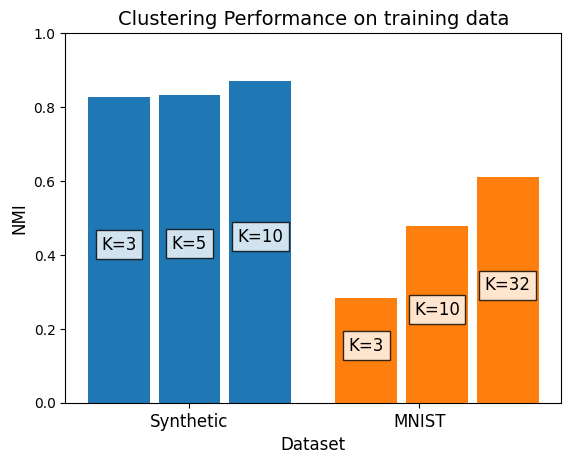

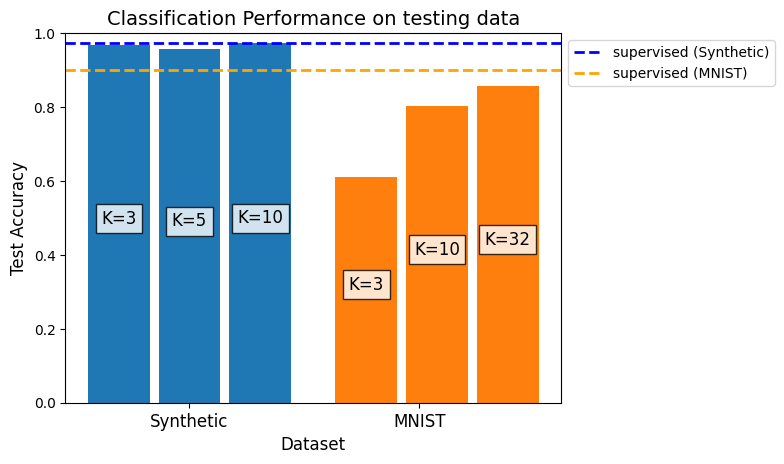

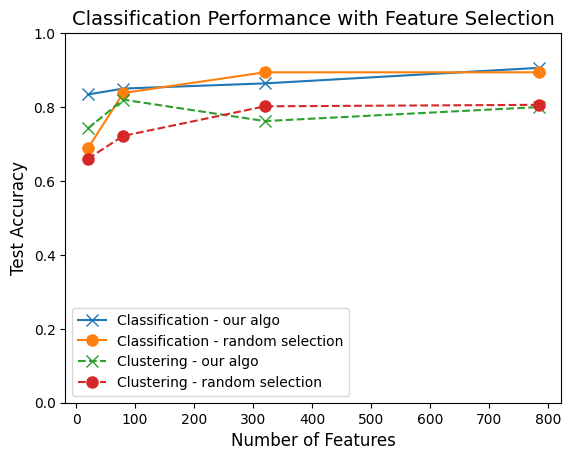

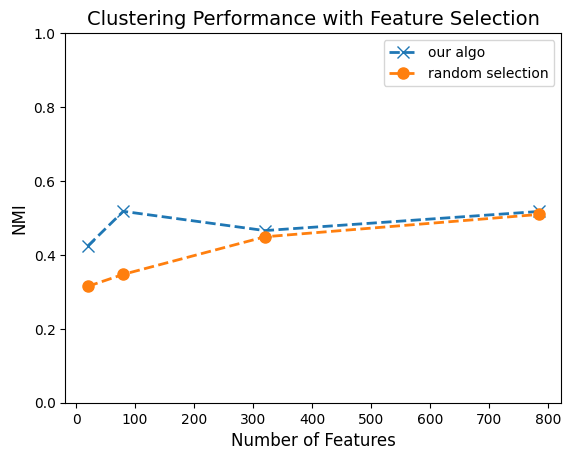

In [56]:
result1 = {'synthetic_test_accuracy':acc_syn, 'mnist_test_accuracy':acc_mnist}


# plot_result(result1 = result1, result2 = result2, result3_2 = result3_2)
plot_result(result1 = result1, result2 = result2, result3_2 = question_4_1_accuracies[1])

# Alternatively
# plot_result(result1 = result1, result2 = result2, result3_2 = result3_2)